# Qiskit Implementations: IBM Quantum Learning - Basics of Quantum Information

In [1]:
from qiskit import __version__
print(__version__)

1.2.4


In [4]:
import numpy as np

ket0 = np.array([[1],[0]])
ket1 = np.array([[0],[1]])

print(ket0 / 2 + ket1 / 2)

[[0.5]
 [0.5]]


In [5]:
M1 = np.array([[1,1], [0,0]])
M2 = np.array([[1,0], [0,1]])

print(M1) 
print(M2)

[[1 1]
 [0 0]]
[[1 0]
 [0 1]]


In [6]:
M = M1/2 + M2/2
print(M)

[[1.  0.5]
 [0.  0.5]]


In [7]:
print(np.matmul(M1, ket1))
print(np.matmul(M1, M2))
print(np.matmul(M, M))

[[1]
 [0]]
[[1 1]
 [0 0]]
[[1.   0.75]
 [0.   0.25]]


In [8]:
from qiskit.visualization import array_to_latex

display(array_to_latex(np.matmul(M1, ket1)))
display(array_to_latex(np.matmul(M1, M2)))
display(array_to_latex(np.matmul(M, M)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Defining and displaying state vectors
Qiskit's `Statevector` class providess this functionality and includes a `draw` method for displaying state vectors in a variety of ways. Note that `j` is used to represent imaginary numbers.

In [10]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

display(u.draw("text"))
display(u.draw("latex"))
print(u.draw("latex_source"))

display(v.draw("latex"))
display(w.draw("latex"))

[0.70710678+0.j,0.70710678+0.j]

<IPython.core.display.Latex object>

\frac{\sqrt{2}}{2} |0\rangle+\frac{\sqrt{2}}{2} |1\rangle


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

The `Statevector` class also includes the `is_valid` method, which checks to see if a given vector is a valid quantum state vector (i.e., Euclidean norm qual to 1).

In [11]:
display(u.is_valid())
display(v.is_valid())
display(w.is_valid())

True

True

False

Note that $||w||=|\frac{1}{3}|^2+|\frac{2}{3}|^2=\frac{1}{9}+\frac{4}{9}=\frac{5}{9}\neq1$

### Simulating measurments using `Statevector`
Running the measure method simulates a standard basis measurement. It returns the outcome of that measurement, plus the new quantum state vector of the system after the measurement.

In [15]:
display(v.draw("latex"))

outcome, state = v.measure()
print(f"Measured: {outcome}\nPost-measurement state:")
display(state.draw("latex"))

<IPython.core.display.Latex object>

Measured: 0
Post-measurement state:


<IPython.core.display.Latex object>

Measurement outcomes are probabilistic, so this method can return different results when run multiple times. Outcomes could be either: $(\frac{1+2i}{\sqrt{5}})|0\rangle$ or $-|1\rangle$


`Statevector` will throw an error if the `measure` method is applied to an invalid quantum state vector. `Statevector` also comes with a `sample_counts` method that allows for the simulation of any number of measurements on the system, each time starting with a freash copy of the state.

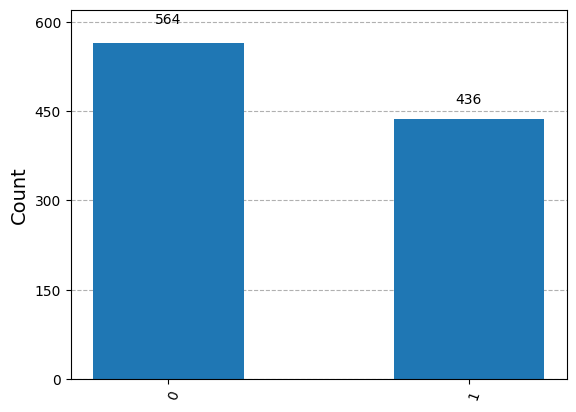

In [16]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
plot_histogram(statistics)

The larger the sample size, the more likely you are to get closer to the corresponding probability (i.e, *law of large numbers* in probability theory).

### Performing operations with `Operator` and `Statevector`
Unitary operations can be defined using the `Operator` class and applying the `evolve` method. Recall that applying a unitary matrix to a quantum state vector results in another quantum state vector.

In [19]:
from qiskit.quantum_info import Operator

Y = Operator([[0, -1.0j], [1.0j, 0]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

display(T.draw("latex")) 

v = Statevector([0, 1])

v = v.evolve(H)
display(v.draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Looking ahead toward quantum circuits
We can compose qubit unitary operations using Qiskit's `QuantumCircuit` class.

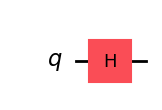

In [21]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)

display(circuit.draw(output="mpl"))

Note that `mpl` is short for `Matplotlib`, a python visualization library. There are other options, including a text-based and LaTeX-based renderer.

To obtain the unitary matrix corresponding to this circuit we can use the `from_circuit` method from the `Operator` class.

In [22]:
display(Operator.from_circuit(circuit).draw("latex"))

<IPython.core.display.Latex object>

We can also initialize a starting quantum state vector and then evolve that state according to the sequence of operations described by the circuit (i.e., the `evolve` method can take either a unitary matrix defined by the `Operator` class or a circuit defined by the `QuantumCircuit` class)

In [23]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
display(v.draw("latex"))

<IPython.core.display.Latex object>

In [ ]:
statistics = v.sample_counts